<a target="_blank" href="https://colab.research.google.com/github/RUTIK675LT/DM_clustering_assignment/blob/main/8%20Clustering%20with%20images/h_image_clustering.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Extraction of /content/drive/MyDrive/colab datasets/images.zip complete.
1/1 [==============================] - 0s 175ms/step
Features array shape: (80, 2048)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


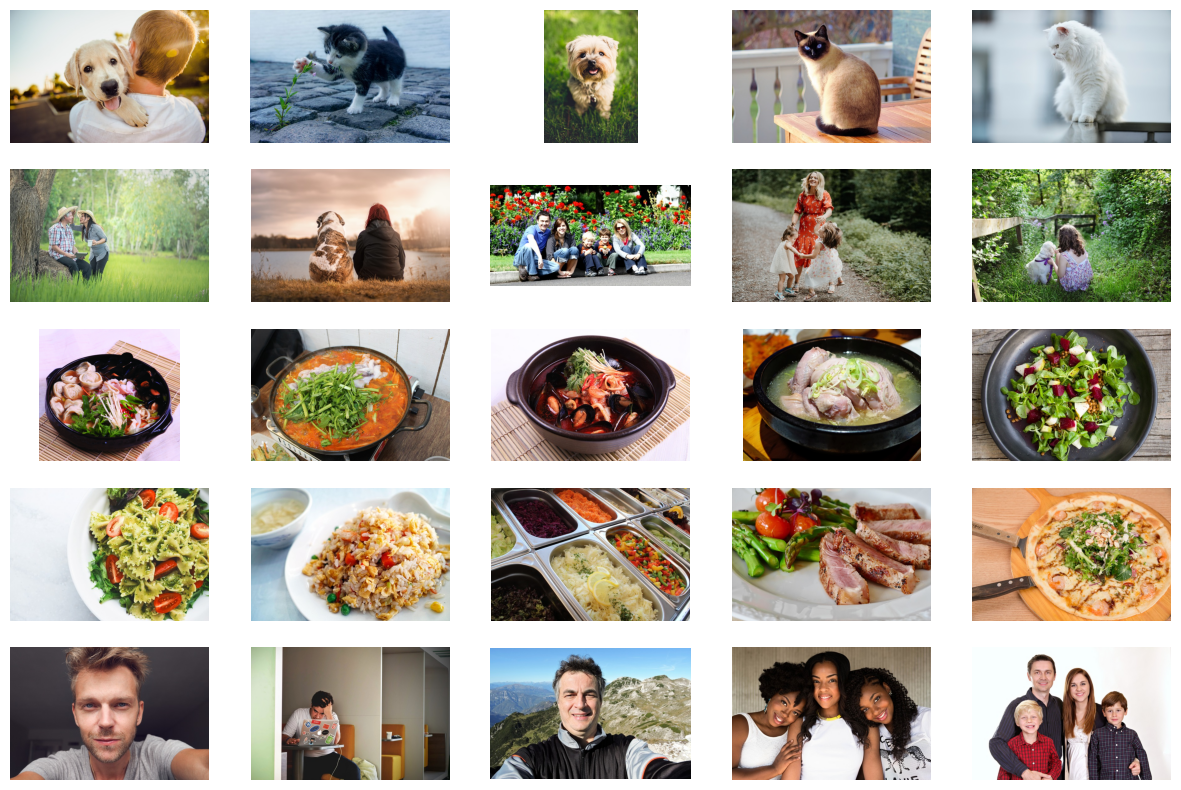

In [5]:
# Import necessary libraries
import zipfile
import os
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
from tensorflow.keras.models import Model
from PIL import Image
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Set the path to the dataset in Google Drive
zip_file_path = '/content/drive/MyDrive/colab datasets/images.zip'  # Adjust this path
extraction_path = '/content/images'

# Function to extract the zip file
def extract_zip(file_path, extract_to):
    try:
        with zipfile.ZipFile(file_path, 'r') as zip_ref:
            zip_ref.extractall(extract_to)
        print(f"Extraction of {file_path} complete.")
    except Exception as e:
        print(f"Error: {e}")

# Extract the zip file
extract_zip(zip_file_path, extraction_path)

# Load the ResNet50 model pre-trained on ImageNet data
model = ResNet50(weights='imagenet')
model = Model(inputs=model.inputs, outputs=model.layers[-2].output)

# Function to extract features from an image using ResNet50
def get_image_features(image_path):
    img = image.load_img(image_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)
    features = model.predict(img_array)
    return features.flatten()

# Process each image and extract features
features = []
image_paths = []
for filename in os.listdir(extraction_path):
    if filename.lower().endswith(('.jpg', '.png', '.jpeg')):
        file_path = os.path.join(extraction_path, filename)
        image_paths.append(file_path)
        features.append(get_image_features(file_path))

# Convert list of features to a numpy array
features_array = np.array(features)

# Check if any features were extracted
if features_array.size == 0:
    raise ValueError("No features were extracted. Check if the image paths are correct and if the images are in a supported format.")

print("Features array shape:", features_array.shape)

# Check if the features array is not empty and has the correct shape
if len(features_array.shape) != 2 or features_array.shape[0] == 0:
    raise ValueError("Features array is not in the correct shape for clustering.")

# Perform K-means clustering
num_clusters = 5  # Adjust this number as needed
kmeans = KMeans(n_clusters=num_clusters)
kmeans.fit(features_array)
labels = kmeans.labels_

# Visualize the clusters
plt.figure(figsize=(15, 10))
for cluster_num in range(num_clusters):
    cluster_indices = np.where(labels == cluster_num)[0]
    for i, index in enumerate(cluster_indices):
        if i >= 5:  # Displaying 5 images per cluster
            break
        plt.subplot(num_clusters, 5, cluster_num * 5 + i + 1)
        img = Image.open(image_paths[index])
        plt.imshow(img)
        plt.axis('off')
plt.show()
